In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [134]:
import os
os.chdir("D:\DataScience\Project DataSet")
os.getcwd()

'D:\\DataScience\\Project DataSet'

In [135]:
Loan_Approval_Data=pd.read_csv("Loan Approval Prediction.csv") 

In [136]:
Loan_Approval_Data.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Approved
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Not Approved
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Approved
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Approved
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,Not Approved
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Approved
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Approved
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Approved


In [137]:
Loan_Approval_Data.shape

(614, 13)

In [138]:
Loan_Approval_Data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [139]:
Loan_Approval_Data.drop(columns=["Loan_ID"],inplace=True)

In [140]:
Loan_Approval_Data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Approved
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Not Approved
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Approved
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Approved
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Approved


# Data Cleansing

In [141]:
missing_values = Loan_Approval_Data.isnull().sum()
missing_values

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [142]:
class_counts = Loan_Approval_Data['Loan_Status'].value_counts(normalize=True)
class_counts

Loan_Status
Approved        0.687296
Not Approved    0.312704
Name: proportion, dtype: float64

In [143]:
# Impute categorical columns with mode
Loan_Approval_Data['Gender'].fillna(Loan_Approval_Data['Gender'].mode()[0], inplace=True)
Loan_Approval_Data['Married'].fillna(Loan_Approval_Data['Married'].mode()[0], inplace=True)
Loan_Approval_Data['Dependents'].fillna(Loan_Approval_Data['Dependents'].mode()[0], inplace=True)
Loan_Approval_Data['Self_Employed'].fillna(Loan_Approval_Data['Self_Employed'].mode()[0], inplace=True)

In [144]:
# Impute numerical columns with median
Loan_Approval_Data['LoanAmount'].fillna(Loan_Approval_Data['LoanAmount'].median(), inplace=True)
Loan_Approval_Data['Loan_Amount_Term'].fillna(Loan_Approval_Data['Loan_Amount_Term'].median(), inplace=True)
Loan_Approval_Data['Loan_Amount_Term'].fillna(Loan_Approval_Data['Loan_Amount_Term'].median(), inplace=True)
Loan_Approval_Data['Credit_History'].fillna(Loan_Approval_Data['Credit_History'].median(), inplace=True)

In [145]:
print('missing values',Loan_Approval_Data.isnull().sum())

missing values Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64


In [146]:
Loan_Approval_Data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Exploratory Data Analysis

## Univariate Analysis

In [147]:
Categorical_columns=Loan_Approval_Data.dtypes[Loan_Approval_Data.dtypes=="object"].index
Categorical_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [148]:
Numerical_columns=Loan_Approval_Data.dtypes[Loan_Approval_Data.dtypes!="object"].index
Numerical_columns

Index(['Applicant_Income', 'Coapplicant_Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

### Univariate Analysis of Categorical Data

In [149]:
for i in Categorical_columns:
    print(f"Result for {i}---------------\n") 
    print(Loan_Approval_Data[i].value_counts(dropna=False,normalize = True))
    print(f"total Unique Category {Loan_Approval_Data[i].nunique()}")
    print("\n")

Result for Gender---------------

Gender
Male      0.81759
Female    0.18241
Name: proportion, dtype: float64
total Unique Category 2


Result for Married---------------

Married
Yes    0.653094
No     0.346906
Name: proportion, dtype: float64
total Unique Category 2


Result for Dependents---------------

Dependents
0     0.586319
1     0.166124
2     0.164495
3+    0.083062
Name: proportion, dtype: float64
total Unique Category 4


Result for Education---------------

Education
Graduate        0.781759
Not Graduate    0.218241
Name: proportion, dtype: float64
total Unique Category 2


Result for Self_Employed---------------

Self_Employed
No     0.86645
Yes    0.13355
Name: proportion, dtype: float64
total Unique Category 2


Result for Property_Area---------------

Property_Area
Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: proportion, dtype: float64
total Unique Category 3


Result for Loan_Status---------------

Loan_Status
Approved        0.687296
Not Ap

In [150]:
def univariate_cat(data,x):
    unique_count=data[x].nunique()
    unique_values=data[x].unique()
    freq_dist=pd.DataFrame(data[x].value_counts().reset_index())
    
    print(f"unique counts of values {unique_count}")
    print(f"unique values {unique_values} \n")
    sns.countplot(data=data, x=x, palette="Set1_r",hue=x, saturation=0.9,)
    plt.title(f"Distribution of {i}")
    plt.show()
    return freq_dist

unique counts of values 2
unique values ['Male' 'Female'] 



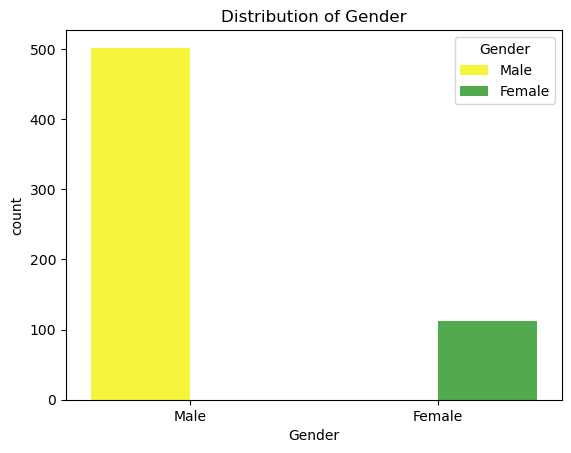

unique counts of values 2
unique values ['No' 'Yes'] 



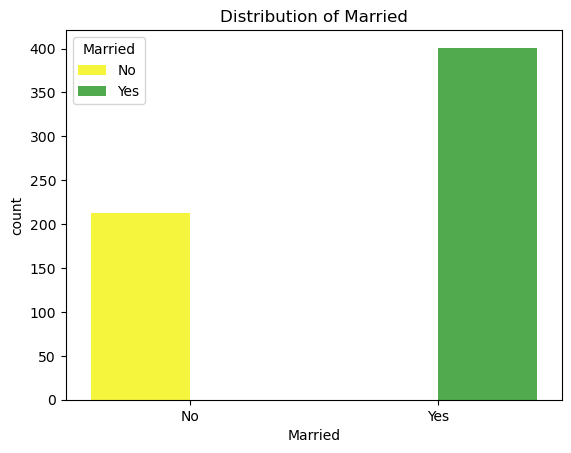

unique counts of values 4
unique values ['0' '1' '2' '3+'] 



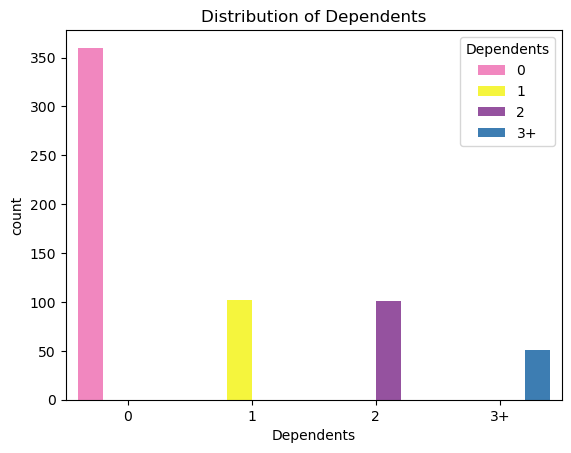

unique counts of values 2
unique values ['Graduate' 'Not Graduate'] 



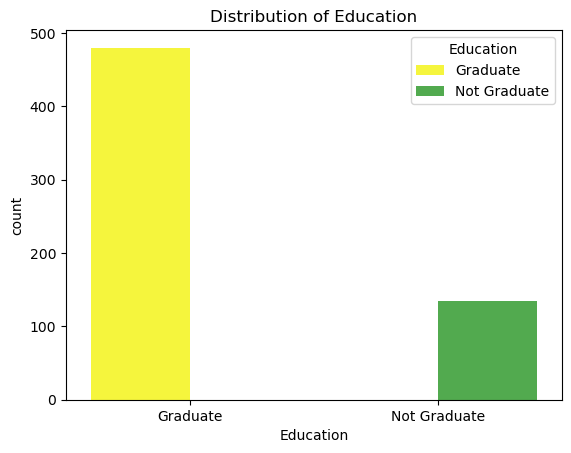

unique counts of values 2
unique values ['No' 'Yes'] 



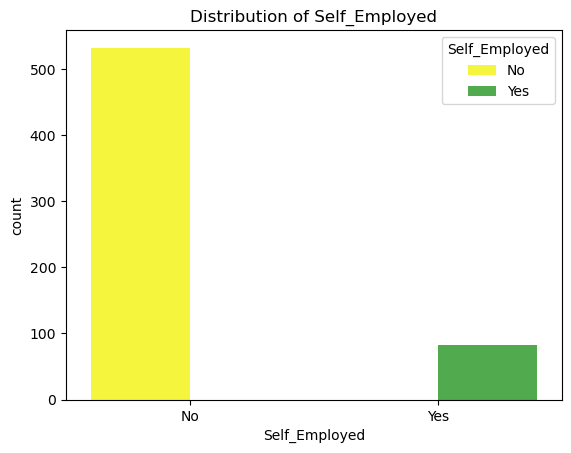

unique counts of values 3
unique values ['Urban' 'Rural' 'Semiurban'] 



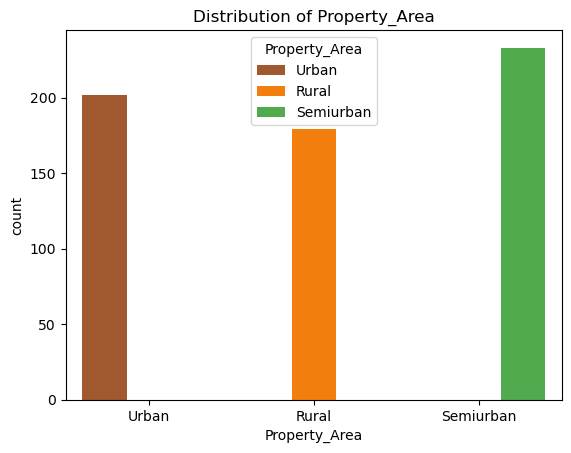

unique counts of values 2
unique values ['Approved' 'Not Approved'] 



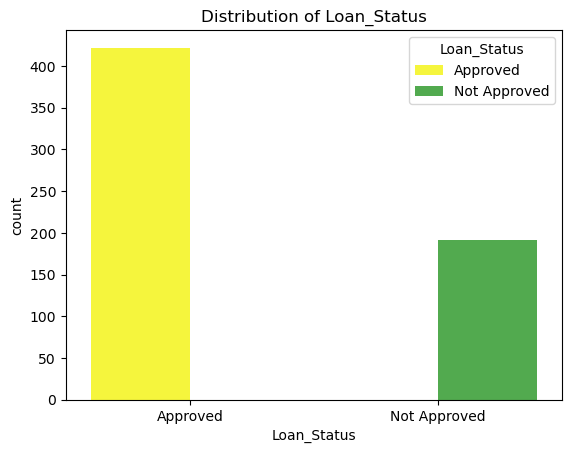

In [151]:
for i in Categorical_columns:
    univariate_cat(data=Loan_Approval_Data,x=i)

### Univariate Analysis of Numerical Daat

In [152]:
Numerical_columns=Loan_Approval_Data.dtypes[Loan_Approval_Data.dtypes!="object"].index
Numerical_columns

Index(['Applicant_Income', 'Coapplicant_Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [153]:
Loan_Approval_Data[Numerical_columns].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Applicant_Income,614.0,5403.459283,6109.041673,150.0,1025.00,1554.12,1800.00,1829.04,1897.55,2216.1,2877.50,3812.5,5795.00,9459.9,14583.0,15364.32,16682.25,19666.04,32540.41,81000.0
Coapplicant_Income,614.0,1621.245798,2926.248369,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1188.5,2297.25,3782.2,4997.4,5397.04,5682.67,7198.56,8895.89,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,30.65,44.00,48.78,54.52,57.30,72.3,100.25,128.0,164.75,229.4,293.4,313.44,356.10,427.94,495.87,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,84.00,180.00,180.00,180.00,180.00,300.0,360.00,360.0,360.00,360.0,360.0,360.00,360.00,480.00,480.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,1.0,1.00,1.0,1.0,1.00,1.00,1.00,1.00,1.0


In [154]:
def univariate_num(data, x, is_plot=True, box_plot=True):
    if is_plot:
        plt.figure(figsize=(6,3))
        sns.histplot(data=data, x=x, kde=True)
        plt.title(f"Distribution of {x}")
        plt.show()
    if box_plot:
        plt.figure(figsize=(6,3))
        plt.boxplot(data[x])
        plt.title(f"Boxplot of {x}")
        plt.show()
    

C:\Users\mdsar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


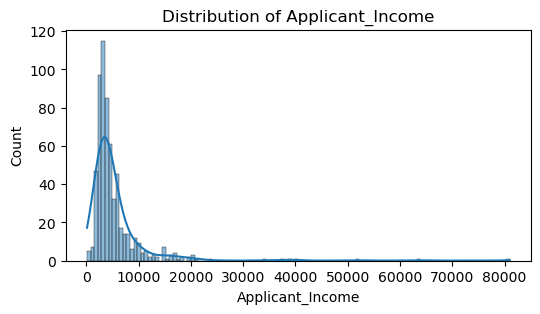

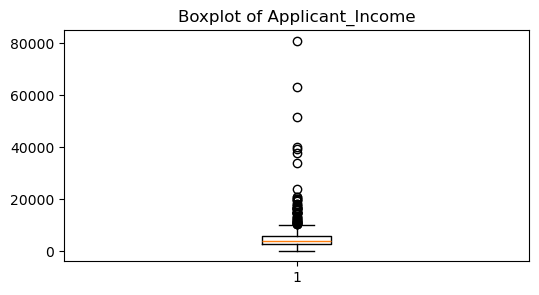

C:\Users\mdsar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


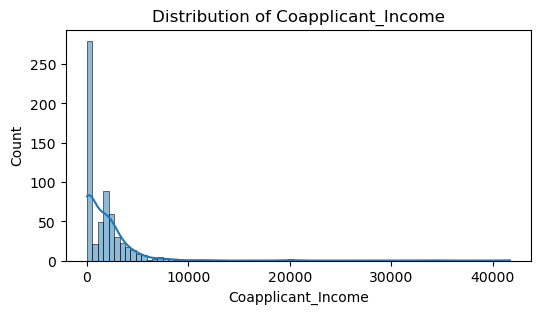

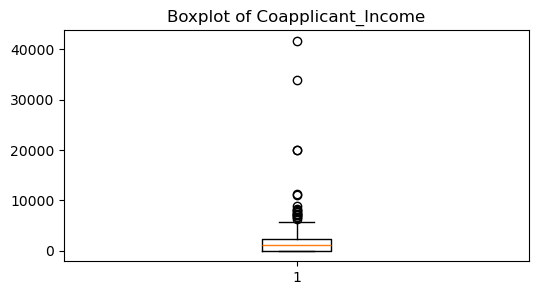

C:\Users\mdsar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


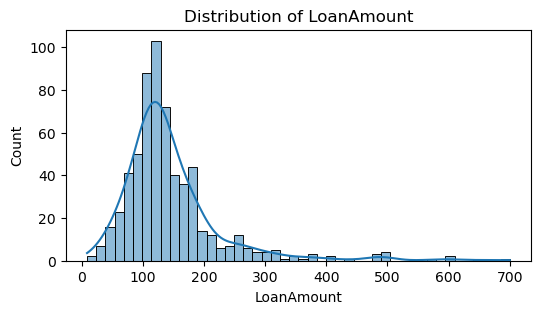

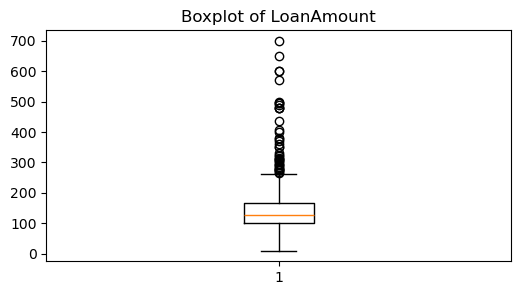

C:\Users\mdsar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


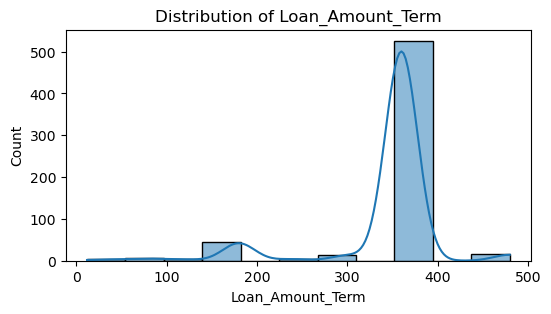

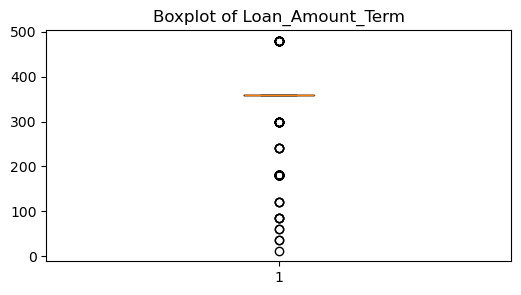

C:\Users\mdsar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


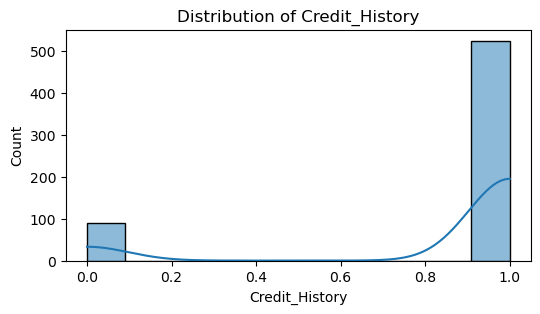

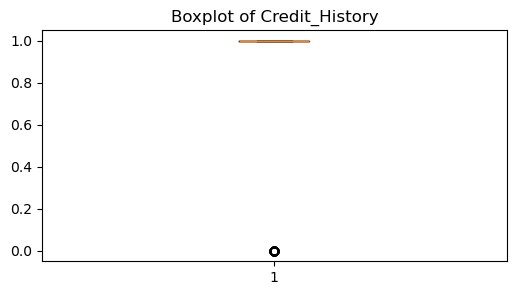

In [155]:
for i in Numerical_columns:
    univariate_num(data=Loan_Approval_Data,x=i,is_plot=True,box_plot=True)

cal

In [156]:
# There two 3 methods for Bivaraite Anaysis of Categorical and Numerical Variable:
# 1 : Group by summary statistics
# 2 : Relationship : T Test / ANOVA Test
# 3 : Graphs : BAr Graph / Pie Chart / Relplot / Box plot

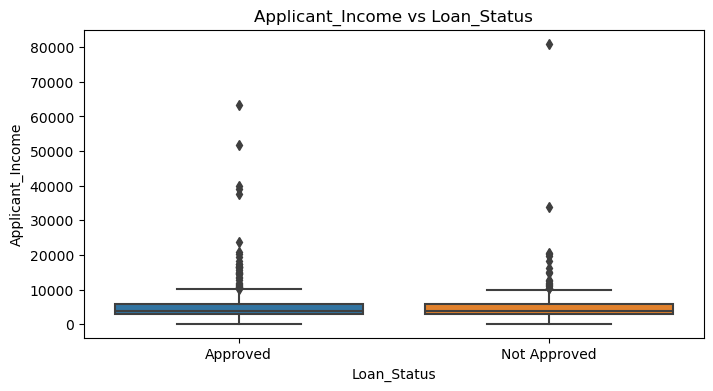

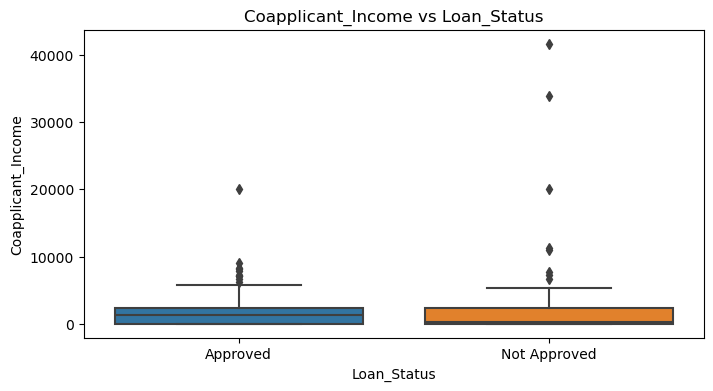

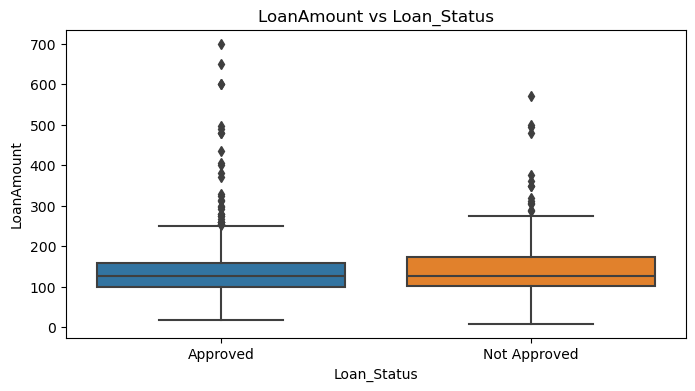

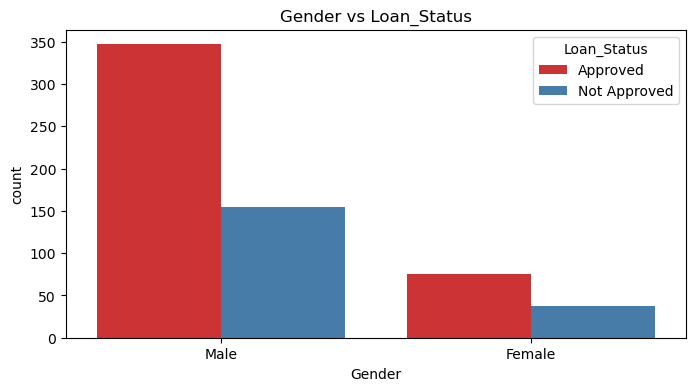

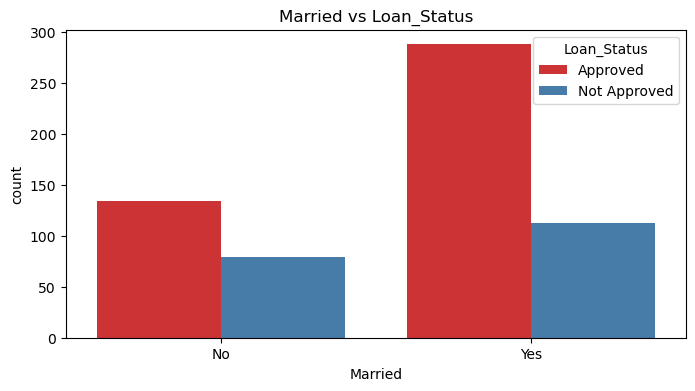

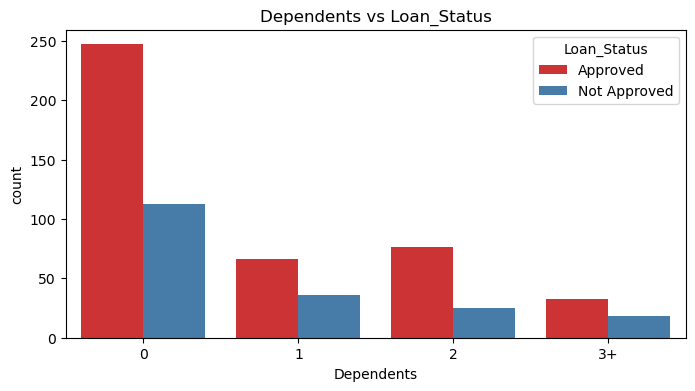

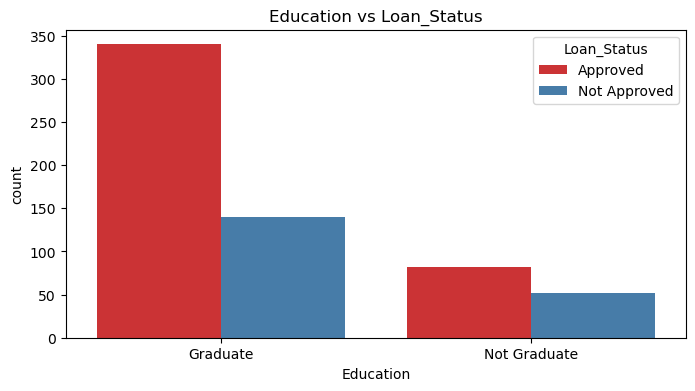

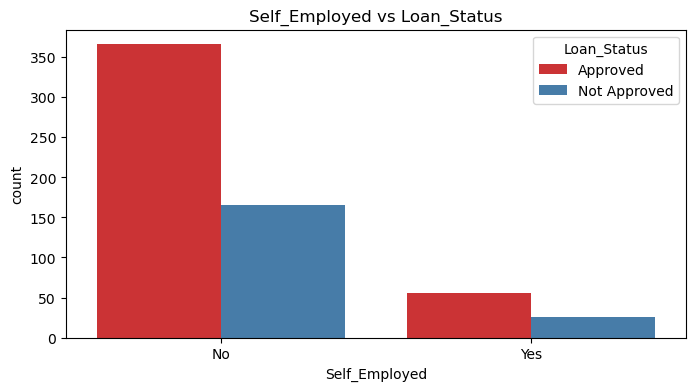

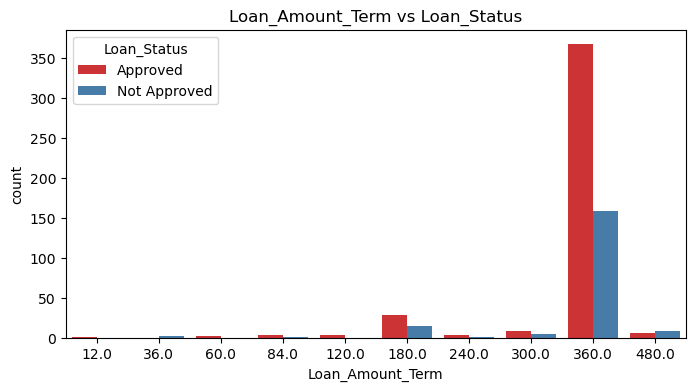

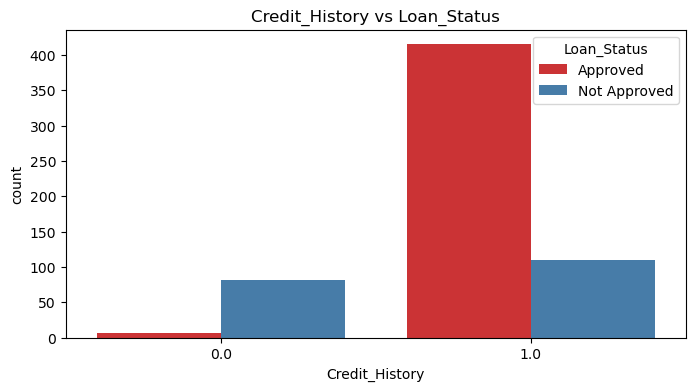

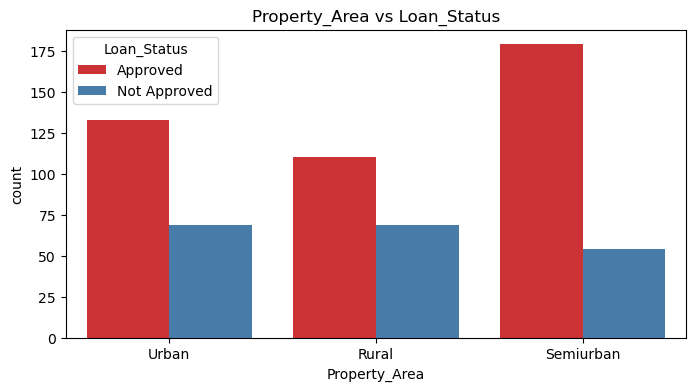

In [157]:
# 2. Categorical to Number
#  Bivariate analysis for numerical features with respect to Loan_Status
numerical_features = ['Applicant_Income', 'Coapplicant_Income', 'LoanAmount']

# Boxplots to visualize the distribution of numerical variables against Loan_Status
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Loan_Status', y=feature, data=Loan_Approval_Data)
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

# 3. Categorical to Categorical
#  Bivariate analysis for categorical features with respect to Loan_Status
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Loan_Amount_Term', 'Credit_History', 'Property_Area']

# Count plots to visualize the distribution of categorical variables against Loan_Status
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, hue='Loan_Status', data=Loan_Approval_Data, palette='Set1')
    plt.title(f'{feature} vs Loan_Status')
    plt.show()


In [158]:
# Outliers
def outlier_method2(data,x):
    q1=data[x].quantile(.25)
    q3=data[x].quantile(.75)
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    # Cap the outliers
    data[x] = np.where(data[x] < lower_bound, lower_bound, data[x])
    data[x] = np.where(data[x] > upper_bound, upper_bound, data[x])

In [159]:
for feature in numerical_features:
    outlier_method2(data=Loan_Approval_Data,x=feature)

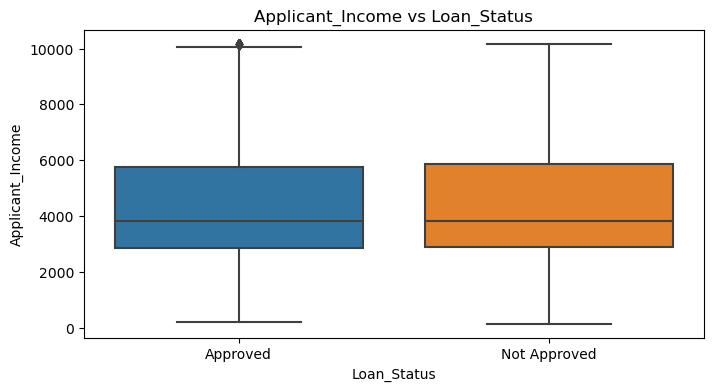

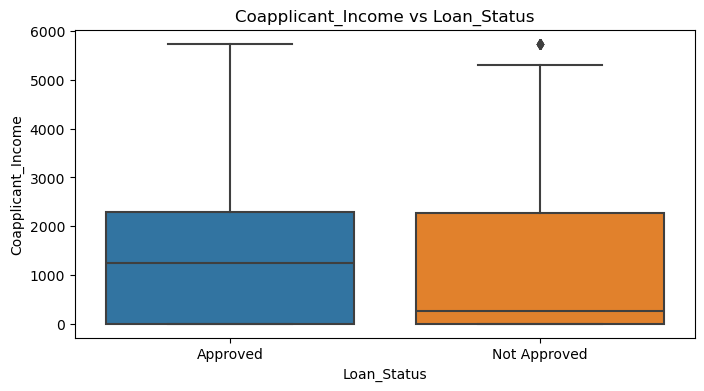

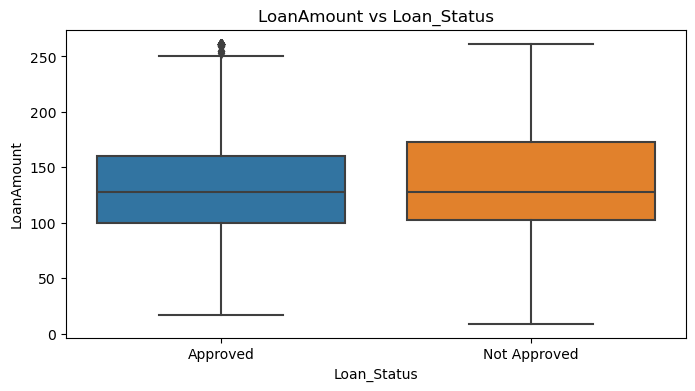

In [160]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Loan_Status', y=feature, data=Loan_Approval_Data)
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

In [161]:
# 1: Using Groupby summary for Bivariate Analysis
# Here Price is Y Variable
Loan_Approval_Data.groupby(["Loan_Status"]).agg({"Applicant_Income":["min","max","mean","std","count"]})

Applicant_Income                                          
                          min       max         mean          std count
Loan_Status                                                            
Approved                210.0  10171.25  4616.372630  2469.060008   422
Not Approved            150.0  10171.25  4618.735677  2509.895939   192

In [162]:
Loan_Approval_Data.groupby(["Loan_Status"]).agg({"Coapplicant_Income":["min","max","mean","std","count"]})

Coapplicant_Income                                          
                            min       max         mean          std count
Loan_Status                                                              
Approved                    0.0  5743.125  1432.822678  1589.254456   422
Not Approved                0.0  5743.125  1390.864583  1703.635671   192

In [163]:
Loan_Approval_Data.groupby(["Loan_Status"]).agg({"LoanAmount":["min","max","mean","std","count"]})

LoanAmount                                    
                    min    max        mean        std count
Loan_Status                                                
Approved           17.0  261.5  135.588863  54.666988   422
Not Approved        9.0  261.5  141.270833  58.105605   192

In [164]:
Loan_Approval_Data.groupby(["Loan_Status"]).agg({"Loan_Amount_Term":["min","max","mean","std","count"]})

Loan_Amount_Term                                   
                          min    max       mean        std count
Loan_Status                                                     
Approved                 12.0  480.0  341.43128  62.697242   422
Not Approved             36.0  480.0  344.56250  68.199402   192

## Multivariate Data Analsys

In [194]:
Numerical_data=Loan_Approval_Data.dtypes[Loan_Approval_Data.dtypes!='object'].index
Numerical_columns=Loan_Approval_Data[Numerical_data]
Numerical_columns

correlation_matrix = Numerical_columns.corr()
correlation_matrix


,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History
Applicant_Income,1.000000,-0.228956,0.557953,-0.023926,0.035345
Coapplicant_Income,-0.228956,1.000000,0.265021,-0.029295,-0.001710
LoanAmount,0.557953,0.265021,1.000000,0.063612,0.004320
Loan_Amount_Term,-0.023926,-0.029295,0.063612,1.000000,-0.004705
Credit_History,0.035345,-0.001710,0.004320,-0.004705,1.000000


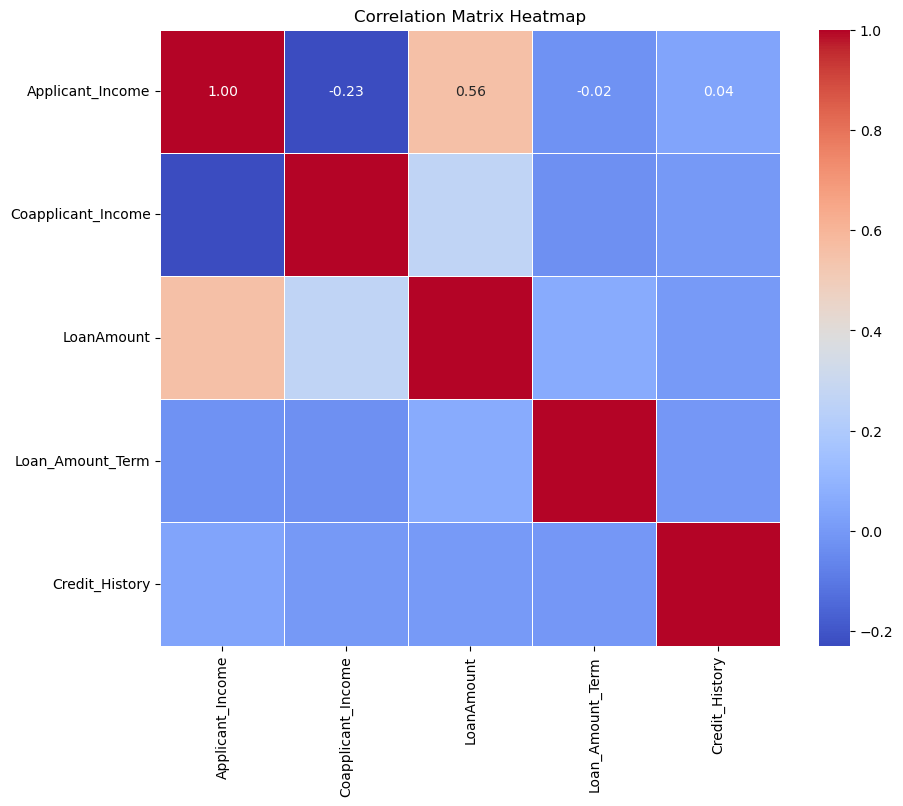

In [195]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Feature Engineering

In [165]:
# Use pandas get_dummies for Encoding for Dummy Creation
Loan_Approval_Data_encoded = pd.get_dummies(Loan_Approval_Data, columns=['Gender', 'Married', 'Self_Employed', 'Education', 'Property_Area', 
    'Dependents', 'Loan_Amount_Term'], drop_first=True)

In [166]:
# Scaling the numerical features (Min-Max Scaling)
scaler = StandardScaler()
numerical_features = ['Applicant_Income', 'Coapplicant_Income', 'LoanAmount']

Loan_Approval_Data_encoded[numerical_features] = scaler.fit_transform(Loan_Approval_Data[numerical_features])

In [167]:
# SVerify the processed dataset
Loan_Approval_Data_encoded.head()

,Applicant_Income,Coapplicant_Income,LoanAmount,Credit_History,Loan_Status,Gender_Male,Married_Yes,Self_Employed_Yes,Education_Not Graduate,Property_Area_Semiurban,...,Dependents_3+,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,0.497164,-0.874587,-0.168041,1.0,Approved,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-0.013767,0.054395,-0.168041,1.0,Not Approved,True,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-0.652632,-0.874587,-1.280462,1.0,Approved,True,True,True,False,False,...,False,False,False,False,False,False,False,False,True,False
3,-0.820924,0.578025,-0.311579,1.0,Approved,True,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0.558104,-0.874587,0.065209,1.0,Approved,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


# Model Development

In [168]:
Loan_Approval_Data_encoded['Loan_Status'] = Loan_Approval_Data_encoded['Loan_Status'].map({'Approved': 1, 'Not Approved': 0})

In [169]:
#  Split the data into training and testing sets (80% train, 20% test)
x = Loan_Approval_Data_encoded.drop('Loan_Status', axis=1)  # Features (drop target variable)
y = Loan_Approval_Data_encoded['Loan_Status']  # Target variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [170]:
# Training the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [172]:
# model's coefficients
coefficients = pd.DataFrame(logreg.coef_[0], x.columns, columns=['Coefficient'])
coefficients=coefficients.sort_values(by='Coefficient', ascending=False)
coefficients

,Coefficient
Credit_History,3.313071
Property_Area_Semiurban,0.903374
Loan_Amount_Term_360.0,0.574993
Married_Yes,0.554646
Loan_Amount_Term_60.0,0.428000
Dependents_2,0.349290
Dependents_3+,0.348694
Loan_Amount_Term_120.0,0.347936
Loan_Amount_Term_180.0,0.240264
Property_Area_Urban,0.221657


<Axes: >

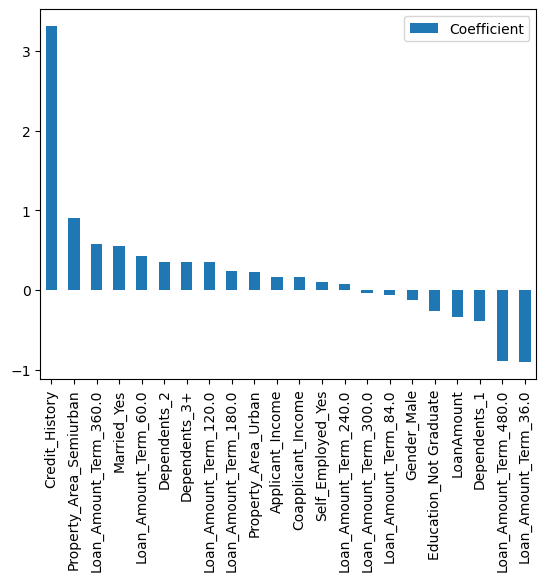

In [173]:
coefficients.plot(kind='bar')

In [176]:
# Making predictions on the train and test set
predicted_train = logreg.predict(x_train)
pd.DataFrame({"Actual Value":y_train , "Predicted Value":predicted_train}).head(10)

,Actual Value,Predicted Value
83,0,1
90,1,1
227,1,1
482,1,1
464,0,0
369,0,1
79,1,1
23,0,0
184,1,1
289,1,1


In [175]:
predicted_test = logreg.predict(x_test)
pd.DataFrame({"Actual Value":y_test , "Predicted Value":predicted_test}).head(10)

,Actual Value,Predicted Value
350,1,1
377,1,1
163,1,1
609,1,1
132,1,1
578,1,1
316,1,1
2,1,1
340,0,1
77,0,1


# Evaluating Model

In [178]:
# Evaluate the model using confusion matrix and classification report
print("Confusion Matrix for train dataset:") 
confusion_matrix_train_dataset=pd.DataFrame(metrics.confusion_matrix(y_train,predicted_train),index=["Actual Not Approved", "Actual Approved"],columns=["Predicted Not Approved","Predicted Approved"])
confusion_matrix_train_dataset

# Here 333 is True positive i.e Correctly predicted approvals
# Here 68 is True negative i.e Correctly predicted rejections.
# Here 81 is False positive i.e Incorrectly predicted approvals.
# Here 9 is False Neagtive i.e Incorrectly predicted rejections.


Confusion Matrix for train dataset:


,Predicted Not Approved,Predicted Approved
Actual Not Approved,68,81
Actual Approved,9,333


In [179]:
print("\nClassification Report for train dataset:")
print(classification_report(y_train,predicted_train ))


Classification Report for train dataset:
              precision    recall  f1-score   support

           0       0.88      0.46      0.60       149
           1       0.80      0.97      0.88       342

    accuracy                           0.82       491
   macro avg       0.84      0.72      0.74       491
weighted avg       0.83      0.82      0.80       491



### Precision: The proportion of true positive predictions out of all positive predictions.
### Recall: The proportion of true positive predictions out of all actual positives.
### F1-score: The harmonic mean of precision and recall.
### Support: The number of actual occurrences of each class

In [180]:
print("Confusion Matrix for test dataset:") 
confusion_test=pd.DataFrame(metrics.confusion_matrix(y_test,predicted_test),index=["Actual Not Approved", "Actual Approved"],columns=["Predicted Not Approved","Predicted Approved"])
confusion_test

# Here 79 is True positive i.e Correctly predicted approvals
# Here 18 is True negative i.e Correctly predicted rejections.
# Here 25 is False positive i.e Incorrectly predicted approvals.
# Here 1 is False Neagtive i.e Incorrectly predicted rejections.

Confusion Matrix for test dataset:


,Predicted Not Approved,Predicted Approved
Actual Not Approved,18,25
Actual Approved,1,79


In [181]:
print("\nClassification Report for test dataset:")
print(classification_report(y_test, predicted_test))


Classification Report for test dataset:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## Calculating AUC and plot ROC curve

In [182]:
probability_of_train_dataset=pd.DataFrame(logreg.predict_proba(x_train),columns=["Not Approved","Approved"])
probability_of_train_dataset

,Not Approved,Approved
0,0.165311,0.834689
1,0.093693,0.906307
2,0.096224,0.903776
3,0.094926,0.905074
4,0.832871,0.167129
...,...,...
486,0.076848,0.923152
487,0.158736,0.841264
488,0.181940,0.818060
489,0.108970,0.891030


In [183]:
auc = roc_auc_score(y_train, probability_of_train_dataset["Approved"])
print(f"AUC Score for Train Data: {auc}")

AUC Score for Train Data: 0.8239628713842773


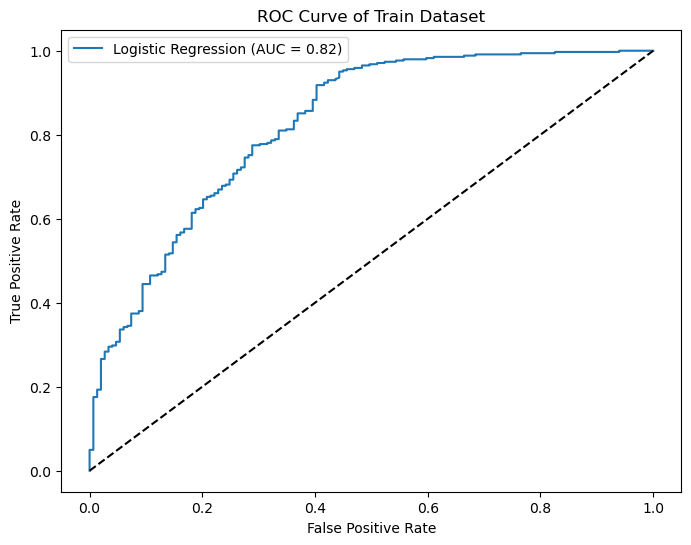

In [184]:
fpr, tpr, threshold = roc_curve(y_train, probability_of_train_dataset["Approved"])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Train Dataset')
plt.legend()
plt.show()

In [185]:
probability_of_test_dataset=pd.DataFrame(logreg.predict_proba(x_test),columns=["Not Approved","Approved"])
probability_of_test_dataset

,Not Approved,Approved
0,0.141786,0.858214
1,0.111193,0.888807
2,0.184068,0.815932
3,0.266361,0.733639
4,0.144190,0.855810
...,...,...
118,0.209022,0.790978
119,0.253936,0.746064
120,0.412486,0.587514
121,0.126174,0.873826


In [186]:
auc = roc_auc_score(y_test, probability_of_test_dataset["Approved"])
print(f"AUC Score for Test Dataset {auc}")

AUC Score for Test Dataset 0.7183139534883721


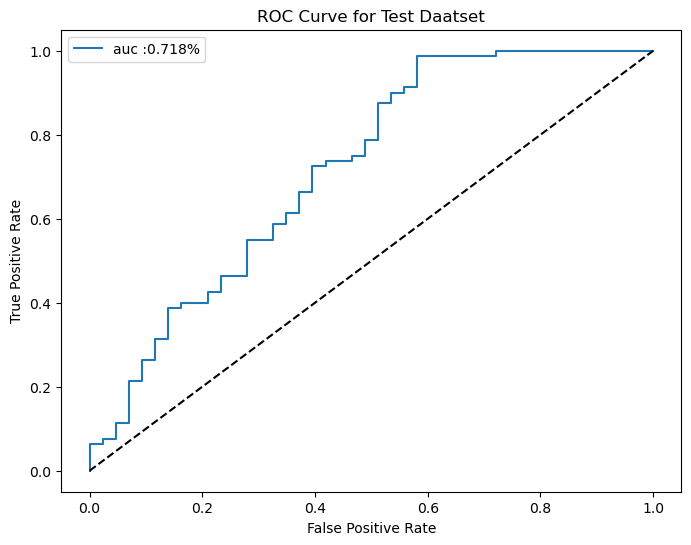

In [187]:
fpr, tpr, threshold = roc_curve(y_test, probability_of_test_dataset["Approved"])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"auc :" + str(round(auc,3)) + str("%"))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Daatset')
plt.legend()
plt.show()

# Tuning Model

In [52]:
# Probabilities of Aprroved Loans
probability_of_test_dataset_1=pd.DataFrame(logreg.predict_proba(x_test),columns=["Not Approved","Approved"])
probability_of_test_dataset_1

,Not Approved,Approved
0,0.141786,0.858214
1,0.111193,0.888807
2,0.184068,0.815932
3,0.266361,0.733639
4,0.144190,0.855810
...,...,...
118,0.209022,0.790978
119,0.253936,0.746064
120,0.412486,0.587514
121,0.126174,0.873826


In [53]:
pd.DataFrame(probability_of_test_dataset_1["Approved"].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9,1]))

,Approved
0.1,0.166873
0.2,0.651669
0.3,0.704621
0.4,0.759722
0.5,0.786763
0.6,0.807839
0.7,0.839904
0.8,0.862088
0.9,0.897678
1.0,0.937047


In [54]:
# Changing the probability cutoff value for classification
selected_probabaility_cutoff=np.where(probability_of_test_dataset_1["Approved"]>=.80,1,0)
selected_probabaility_cutoff

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [55]:
# Applying the new cut
print(metrics.classification_report(y_test,selected_probabaility_cutoff))

              precision    recall  f1-score   support

           0       0.44      0.72      0.54        43
           1       0.77      0.50      0.61        80

    accuracy                           0.58       123
   macro avg       0.60      0.61      0.57       123
weighted avg       0.65      0.58      0.58       123



In [56]:
confusion_train_1=pd.DataFrame(metrics.confusion_matrix(y_test,selected_probabaility_cutoff),index=["Actual Not Approved", "Actual Approved"],columns=["Predicted  Not Approved","Predicted  Approved"])
confusion_train_1

,Predicted Not Approved,Predicted Approved
Actual Not Approved,31,12
Actual Approved,40,40


In [57]:
auc=metrics.roc_auc_score(y_train, predicted_train)
auc

0.7150300247262452

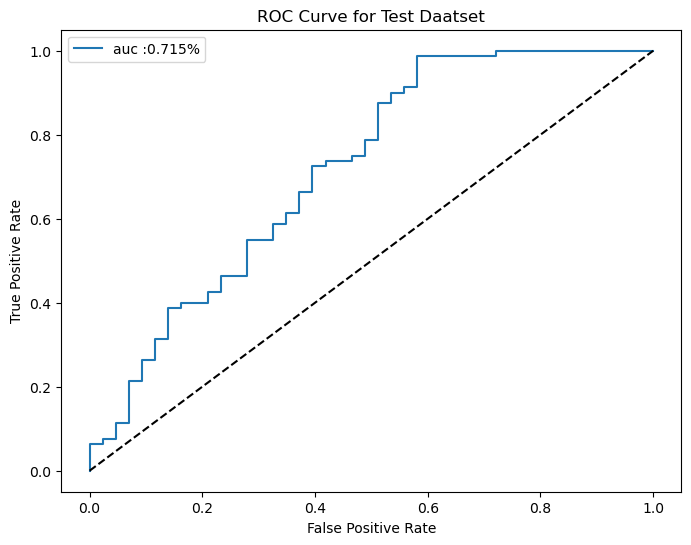

In [58]:
fpr, tpr, threshold = roc_curve(y_test, probability_of_test_dataset["Approved"])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"auc :" + str(round(auc,3)) + str("%"))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Daatset')
plt.legend()
plt.show()